In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Checking the data types and also the missing values

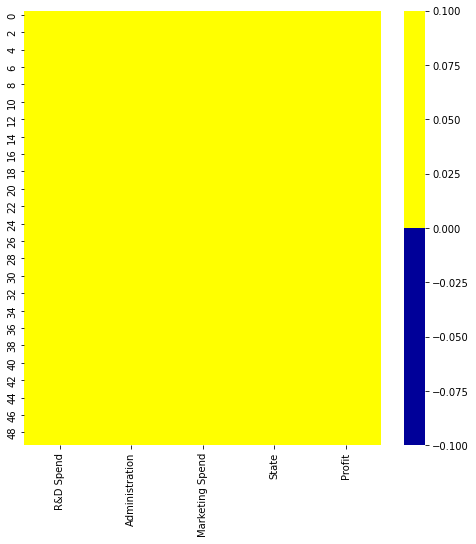

In [ ]:
cols=dataset.columns
fig=plt.figure(figsize=(8,8))
color=['#000099','#ffff00']
sns.heatmap(dataset[cols].isnull(),cmap=sns.color_palette(color))

Here From the heat map we can infer that there is no null values

**Outliers detection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

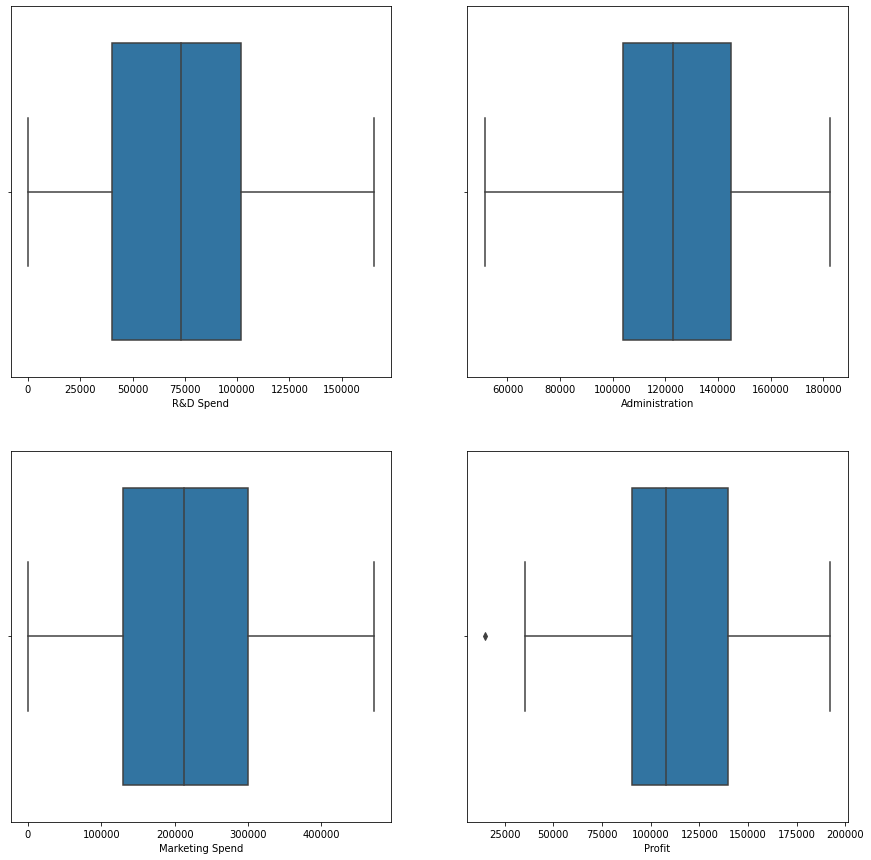

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(dataset['R&D Spend'])
plt.subplot(2,2,2)
sns.boxplot(dataset['Administration'])
plt.subplot(2,2,3)
sns.boxplot(dataset['Marketing Spend'])
plt.subplot(2,2,4)
sns.boxplot(dataset['Profit'])

Here from we can see outliers in the case of profit

In [ ]:
dataset['State'].describe()

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object

Here for the categorical variable we can see that there are only 3 unique states

Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

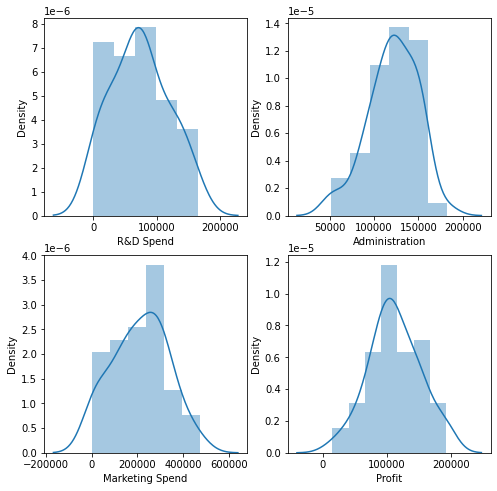

In [ ]:
#histogram 
fig=plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.distplot(dataset['R&D Spend'])
plt.subplot(2,2,2)
sns.distplot(dataset['Administration'])
plt.subplot(2,2,3)
sns.distplot(dataset['Marketing Spend'])
plt.subplot(2,2,4)
sns.distplot(dataset['Profit'])

This helps to find the distribution of each of the data set

#Finding duplicates

In [ ]:
dataset[dataset.duplicated()].sum()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

Here we can infer that there is no duplicate entries

Pair plot

Helps to indentify the type of relationship between different elements

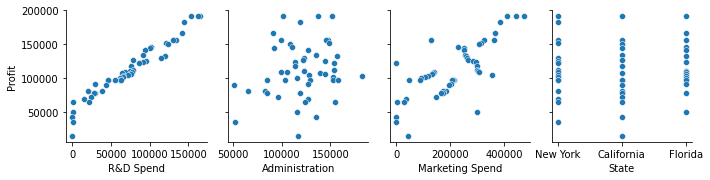

In [ ]:
sns.pairplot(dataset,x_vars=['R&D Spend','Administration','Marketing Spend','State'],y_vars='Profit')

Here are outplut variable is profit so we compare the scatter plot of different parameters againt the profit in scatter plot


Here we can observe a strong linear relationship  between R&D spend with profit
,and a mild relationship between profit and marketing spend,but we don't have much relations ship between administration and profit we can try transformation to chech wheather there is any improvement 

In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


This step helps to get idea about the data set and wheather or not to do feature scaling .Here in this case feature scaling is not required as all the numerical columns values are in same scale

But we have to perform encoding for categorical variable.i.e:state

Selecting dependent and independent variable

In [ ]:
X=dataset.iloc[:,:4].values
y=dataset.iloc[:,4].values

In [ ]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

Final one hot encoding to convert independent categorical to numerical

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Here there is chance of high multicolinearity between the encoded dummies so inorder to reduce multicolinearity(dummy variable trap) so we drop one column

In [ ]:
X=X1=X2=X[:,1:]

In [ ]:
X[0:5,:]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

**Splitting Data set **

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [ ]:
X_train[0:5,:]

array([[1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 1.0, 65605.48, 153032.06, 107138.38]], dtype=object)

In [ ]:
y_train

array([155752.6 , 132602.65,  64926.08,  35673.41, 101004.64, 129917.04,
        99937.59,  97427.84, 126992.93,  71498.49, 118474.03,  69758.98,
       152211.77, 134307.35, 107404.34, 156991.12, 125370.37,  78239.91,
        14681.4 , 191792.06, 141585.52,  89949.14, 108552.04, 156122.51,
       108733.99,  90708.19, 111313.02, 122776.86, 149759.96,  81005.76,
        49490.75, 182901.99, 192261.83,  42559.73,  65200.33])

**Model Fitting**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)

Let us now find the error of the model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

R square test

In [ ]:
print("R square values : {}".format(r2_score(y_true=y_test,y_pred=y_pred)))

R square values : 0.935868097004653


Here the r squre value of the model is high

Let us check mean of residuals

In [ ]:
y_test-y_pred

array([-1000.38472171, 11722.51500788, 12211.09992233,  5214.05510583,
       11129.4623811 , -9541.00079234, 14784.62738653,  -921.40840122,
       -4147.57808602, -3179.56639895,   256.29460019,  8438.83817129,
       -5216.45405525,  6293.6102149 , -3753.56250064])

In [ ]:
residuals=y_test-y_pred   #Residual = actual y value − predicted y value
mean_residuals=np.mean(residuals)
print('Mean of residuals : {}'.format(mean_residuals))

Mean of residuals : 2819.3698555949763


Here the residual value is very high so we will go for a better model

**Checking for homscedasticity**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


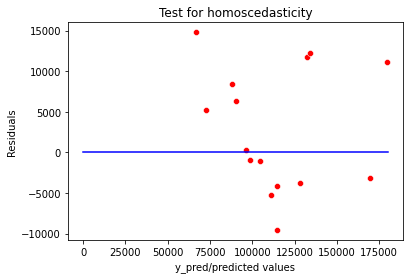

In [ ]:
sns.scatterplot(y_pred,residuals,color='red')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Test for homoscedasticity')
sns.lineplot([0,180000],[0,0],color='Blue')

**Check For multicolinearity**

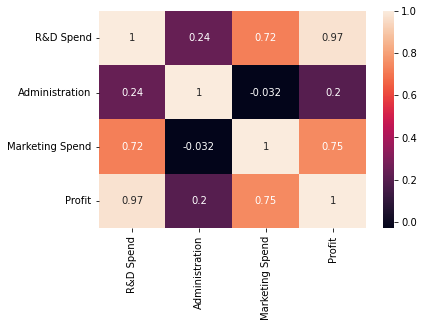

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


This correlation heat map gives us a better idea of the correlation between parameters
Here there is 

Check normality of 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


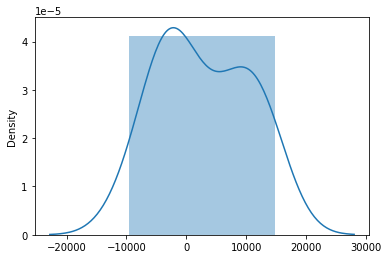

In [ ]:
sns.distplot(residuals,kde=True)

There is actul deviation from  normal distribution

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#Building Optimal model
import statsmodels.api as sm
X = np.append(arr =np.ones((50,1)).astype(int),values =X,axis=1)

We know that in the equation of multi linear regression there is a constant term so for that we will add a column which contain 1

Using backward elminiation method we can find the most import parameter which is contributing to predicting the resultant values

In [ ]:
X_opt=X[:,[0,1,2,3,4,5]]
X_opt=np.array(X_opt,dtype=float)
regressor_ols=sm.OLS(endog=y,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        11:42:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We significance level is 5% so we will remove the paramater with the highest p value and repeat the step till we get the parameters under the significance level

In [ ]:
#Backward Elimination
X_opt = X[:, [0,1,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
#ordinary least square methods ,endog-dependent variable,exog -dependent variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           8.49e-29
Time:                        11:42:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Backward Elimination
X_opt = X[:, [0,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
#ordinary least square methods ,endog-dependent variable,exog -dependent variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        11:42:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Backward Elimination
X_opt = X[:, [0,3,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
#ordinary least square methods ,endog-dependent variable,exog -dependent variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           2.16e-31
Time:                        11:42:14   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Backward Elimination
X_opt = X[:, [0,3,4]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
#ordinary least square methods ,endog-dependent variable,exog -dependent variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           7.29e-31
Time:                        11:42:14   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
x1             0.8621      0.030     28.589      0.000       0.801       0.923
x2            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Backward Elimination
X_opt = X[:, [0,3]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
#ordinary least square methods ,endog-dependent variable,exog -dependent variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           3.50e-32
Time:                        11:42:14   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can infer that the paramater R&D spend is having the highest dependency on the output variable

This is the optimal model 

Let us transform data set

**Square TRANSFORMATION**

In [ ]:
X1[:,0]=X1[:,0]**2
X1[:,1]=X1[:,1]**2
X1[:,2]=X1[:,2]**2
X1[:,3]=X1[:,3]**2
X1[:,4]=X1[:,4]**2
y1=y**2

In [ ]:
X1

array([[0.0, 1.0, 27340357940.640003, 18741007644.839996,
        222580237012.80997],
       [0.0, 0.0, 26438012045.290005, 22915174754.2081,
        197045904936.16092],
       [1.0, 0.0, 23544296991.0801, 10230422284.8025, 166410588925.0116],
       [0.0, 1.0, 20843392769.2081, 14083007982.4225, 146841948768.1444],
       [1.0, 0.0, 20194496081.8756, 8352455623.732901,
        134079311805.29639],
       [0.0, 1.0, 17391516753.609997, 9962976332.384102,
        131668366581.04959],
       [0.0, 0.0, 18121322071.011597, 21667507329.276897,
        16311586110.912401],
       [1.0, 0.0, 16977602681.4969, 21178998363.6036, 104896103847.8224],
       [0.0, 1.0, 14530499127.950401, 22117326089.102505,
        97102842504.62408],
       [0.0, 0.0, 15211492624.6144, 11811161991.888899, 93013788537.8244],
       [1.0, 0.0, 10386275875.086401, 12231057166.6921,
        52514741004.902504],
       [0.0, 0.0, 10134843530.241602, 8425516084.1721, 62372340254.70249],
       [1.0, 0.0, 8810403564

In [ ]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


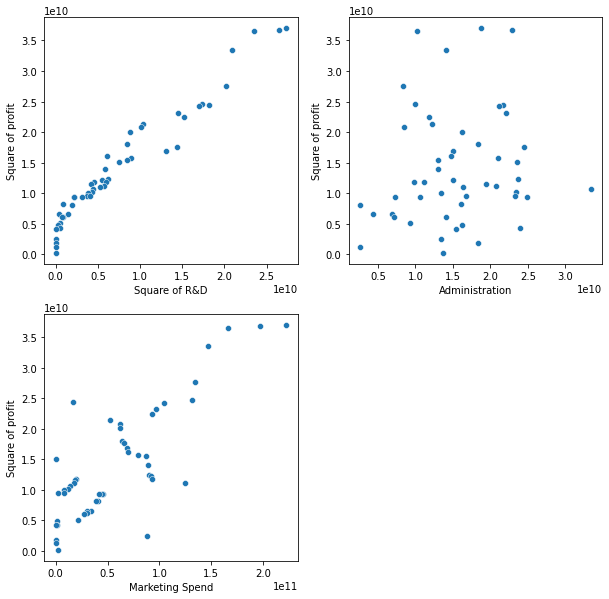

In [ ]:
figu=plt.figure(figsize=(10,10))
j=1
k=0
name=['Square of R&D','Administration','Marketing Spend']
for i in range(2,5):
  plt.subplot(2,2,j)
  plt.xlabel(name[k])
  plt.ylabel('Square of profit')
  sns.scatterplot(X1[:,i],y1)
  j=j+1
  k=k+1


Here ther is less linear realationship of independent variable with dependent variable 

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.2,random_state=0)

In [ ]:
X1 = np.append(arr =np.ones((50,1)).astype(int),values =X1,axis=1)

In [ ]:
X1[0:5,:]

array([[1, 0.0, 1.0, 27340357940.640003, 18741007644.839996,
        222580237012.80997],
       [1, 0.0, 0.0, 26438012045.290005, 22915174754.2081,
        197045904936.16092],
       [1, 1.0, 0.0, 23544296991.0801, 10230422284.8025,
        166410588925.0116],
       [1, 0.0, 1.0, 20843392769.2081, 14083007982.4225,
        146841948768.1444],
       [1, 1.0, 0.0, 20194496081.8756, 8352455623.732901,
        134079311805.29639]], dtype=object)

In [ ]:
X_opt1=X1[:,[0,1,2,3,4,5]]
X_opt1=np.array(X_opt1,dtype=float)
model2=sm.OLS(endog=y1,exog=X_opt1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     170.2
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.29e-27
Time:                        11:42:15   Log-Likelihood:                -1142.9
No. Observations:                  50   AIC:                             2298.
Df Residuals:                      44   BIC:                             2309.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.126e+09   9.64e+08      5.317      0.0

Backward elimination

In [ ]:
X_opt1=X1[:,[0,2,3,4,5]]
X_opt1=np.array(X_opt1,dtype=float)
model2=sm.OLS(endog=y1,exog=X_opt1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           8.22e-29
Time:                        11:42:15   Log-Likelihood:                -1142.9
No. Observations:                  50   AIC:                             2296.
Df Residuals:                      45   BIC:                             2305.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.156e+09   9.07e+08      5.686      0.0

In [ ]:
X_opt1=X1[:,[0,2,3,5]]
X_opt1=np.array(X_opt1,dtype=float)
model2=sm.OLS(endog=y1,exog=X_opt1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     295.9
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           4.55e-30
Time:                        11:42:15   Log-Likelihood:                -1143.0
No. Observations:                  50   AIC:                             2294.
Df Residuals:                      46   BIC:                             2302.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.944e+09   4.97e+08      9.944      0.0

In [ ]:
X_opt1=X1[:,[0,3,5]]
X_opt1=np.array(X_opt1,dtype=float)
model2=sm.OLS(endog=y1,exog=X_opt1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     446.4
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           2.67e-31
Time:                        11:42:15   Log-Likelihood:                -1143.3
No. Observations:                  50   AIC:                             2293.
Df Residuals:                      47   BIC:                             2298.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.781e+09   4.55e+08     10.501      0.0

In [ ]:
X_opt1=X1[:,[0,3]]
X_opt1=np.array(X_opt1,dtype=float)
model2=sm.OLS(endog=y1,exog=X_opt1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     870.0
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           2.05e-32
Time:                        11:42:15   Log-Likelihood:                -1144.5
No. Observations:                  50   AIC:                             2293.
Df Residuals:                      48   BIC:                             2297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.002e+09   4.34e+08     11.514      0.0

There is no significat increase in the r square or adjusted r square values